In [ ]:
#importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#downloading the dataset and initializing our test and train samples
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

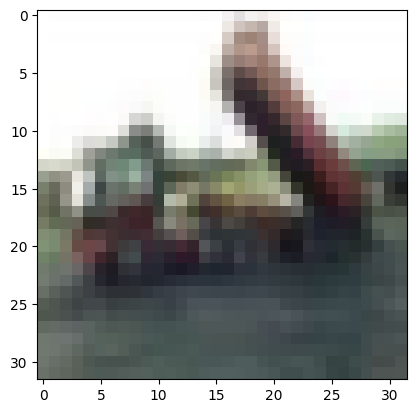

In [ ]:
#showing the third image in training set, for illustration purposes only
plt.imshow(X_train[2])

In [ ]:
# y_train = y_train.reshape(-1,)
# y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
#normalizing the data set as values of pixels range from 0 to 255, this will scale it in a range of 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#doing the image classification using ANN

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8154 - accuracy: 0.3519
Epoch 2/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.6251 - accuracy: 0.4250
Epoch 3/5
1563/1563 [==============================] - 173s 111ms/step - loss: 1.5419 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4852 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4324 - accuracy: 0.4963


In [21]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 158.9176 - accuracy: 0.4729


[158.91761779785156, 0.47290000319480896]

In [20]:
#now using CNN

cnn = models.Sequential([
    #cnn
    # convolution layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),

    # pooling layer
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #ann
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4940 - accuracy: 0.4627
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1326 - accuracy: 0.6040
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0072 - accuracy: 0.6484
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9272 - accuracy: 0.6774
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8647 - accuracy: 0.6983
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8113 - accuracy: 0.7177
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7681 - accuracy: 0.7322
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7256 - accuracy: 0.7460
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6897 - accuracy: 0.7586
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [15]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9357 - accuracy: 0.6836


[0.9357398152351379, 0.6836000084877014]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[4.43121791e-01, 2.48071942e-02, 3.13903481e-01, 9.93886948e-01,
        1.23369932e-01, 9.77495909e-01, 1.67087615e-01, 1.30397575e-02,
        9.11892593e-01, 2.21793473e-01],
       [9.86131966e-01, 9.98296559e-01, 4.65304732e-01, 5.22072800e-03,
        2.01730523e-02, 3.85236985e-04, 2.66354494e-02, 1.07446429e-03,
        9.98211980e-01, 6.57911241e-01],
       [7.55994022e-01, 9.17691827e-01, 6.70998394e-01, 5.95556617e-01,
        6.18552752e-02, 5.27838208e-02, 5.52722327e-02, 1.43959507e-01,
        8.79958630e-01, 6.18316948e-01],
       [9.89717066e-01, 7.74452388e-01, 6.76089108e-01, 1.39901951e-01,
        8.48347098e-02, 1.92014594e-02, 3.19369361e-02, 1.09533638e-01,
        8.85672271e-01, 4.45820928e-01],
       [1.33292878e-03, 1.43368918e-04, 8.86496127e-01, 9.58705664e-01,
        9.95643020e-01, 7.59178400e-01, 9.96220767e-01, 7.55262934e-03,
        3.77024710e-02, 3.46979905e-05]], dtype=float32)

# Conclusion:

We did the image classification task and got an accuracy of about **49%**
using ANN and then CNN yielded us an accuracy of **77%** on the training set.

On the test set, ANN gave us an accuracy of ***47%*** while CNN was accurate upto ***68%***.

Hence we come to the conclusion that a CNN is far better than an ANN for image classification purposes.